In [3]:
!pip install deep_utils[cv]

In [4]:
# os.chdir("/content/drive/MyDrive/skin")
# Unzip weights
# !unzip ./saved_models.zip 

In [5]:
!pip install seaborn

In [6]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
from deep_utils import log_print
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

sns.set()

/home/ai/miniconda3/envs/torch_gpu/lib/python3.9/site-packages/deep_utils/callbacks/tf_keras/__init__.py:3: UserWarning: 
No module named 'tensorflow'. If you don't use LRScalar ignore this message.
  LRScalar = import_module(


In [52]:
lbls2lbls = {'r2unet_cbam':'R2UC',
             'r2unet':'R2U',
             'unet_res50':'UR50',
             'unet_conv_deconv':'UCD',
             'unet_attention_gate':'UAG',
             'unet_cbam':'UC',
             'unet_cbam_gate':'UCG',
             'unet_pyramid_cbam_gate':'UPCG',
             'mcg_unet':'MCGU',
             'double_unet':'DU'}

In [7]:
def get_mean_std(csv_lists,
                 arguments=("accuracy", "loss", "val_accuracy", "val_loss"),
                 operators=(max, min, max, min),
                 save_path=None,
                 logger=None,
                 ):
    metrics = defaultdict(list)
    log_print(logger, f"Extracting values from csv files...")
    for csv in csv_lists:
        log_print(logger, f"Getting the values of file {csv}")
        csv_file = pd.read_csv(csv)
        for metric, op in zip(arguments, operators):
            val = op(csv_file[metric])
            metrics[metric].append(val)

    metrics = {metric: {"std": round(np.std(val_list), 4), "mean": round(np.mean(val_list), 4)} for metric, val_list in
               metrics.items()}
    if save_path is not None:
        df = pd.DataFrame([[val['mean'], val['std']] for _, val in metrics.items()], columns=['mean', 'std'],
                          index=list(metrics.keys()))
        df.to_csv(save_path)
        log_print(logger, f"Saving extracted file to {save_path}")

    return metrics


In [8]:
def save_print_mean_std(save_path, dataset_name, model, train_identifier, multi_train, metrics_names, metrics_operators, model_path):
    try:
        csv_addresses = [
 os.path.join(save_path, dataset_name, model, f"{train_identifier}_{n}", "exp_1" , "csv_logger_train.csv") for n in range(multi_train)   
]
        final_csv = os.path.join(save_path, dataset_name, model, f"{train_identifier}_mean_std_metrics.csv")
        metrics = get_mean_std(csv_addresses, 
                       arguments=metrics_names,
                       operators=metrics_operators,
                       save_path=final_csv,
                      )
        for name, metric in metrics.items():
            print(f"[INFO] Model: {model} == > {name}: {metric}")
    except Exception as e:
        print(f"[ERROR] {e} raised for {model_path}")
    return final_csv

def get_val(csv_path, values=("dice_score", "val_dice_score")):
  df = pd.read_csv(csv_path, index_col=0)
  result = dict()
  for val in values:
    mean, std = df.loc[val].values
    result["mean" + f"_{val}"] = mean
    result["std" + f"_{val}"] = std
  return result


def grouped_mean_std_bar_plot(x_names, mean, std, xlabel="", ylabel="", title="", legends="", width=0.25,
                              save_path=None, ylim=(0, 1)):
    import numpy as np
    import matplotlib.pyplot as plt
    x = np.arange(len(x_names))
    w = -len(mean) // 2 * (width / 2) if len(mean) % 2 == 0 else -len(mean) // 2 * width
    plt.figure(figsize=(25, 12))
    # plot data in grouped manner of bar type
    colors = ["green", "orange"]
    for m, s, color, legend in zip(mean, std, colors, legends):
        plt.bar(x - w, m, width, color=color, label=legend)
        plt.errorbar(x - w, m, yerr=s, fmt="o", color="r")
        w += width
    plt.xticks(x, x_names)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.title(title)
    plt.legend(loc="best", fancybox=True, framealpha=0.5)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [9]:
dataset_name = "ISIC_2016"
train_identifiers = ["usual", 
                     "usual_cutmix_mosaic",
                     "usual_cutmix_mosaic_hair_rmv",
                     "usual_cutmix_mosaic_hair_aug"
                     ]
model_names = [
    'r2unet_cbam',
    'r2unet',
    'unet_res50',
    'unet_conv_deconv',
    'unet_attention_gate', # This model is not deterministic
    'unet_cbam',
    'unet_cbam_gate',
    'unet_pyramid_cbam_gate',
    "mcg_unet",
    'double_unet',
    ]
multi_train = 5               
save_path = "saved_models/"
train_identifier = "usual"

metrics_names = (
    "dice_loss", 
    "dice_score",
    "focal_tversky_loss",
    "iou",
    "jaccard_loss",
    "loss",
    "val_dice_loss",
    "val_dice_score",
    "val_focal_tversky_loss",
    "val_iou",
    "val_jaccard_loss",
    "val_loss"
         )
metrics_operators = (min, max, min, max, min, min, min, max, min, max, min, min)

[INFO] Extracting values from csv files...
[INFO] Getting the values of file saved_models/ISIC_2016/r2unet_cbam/usual_0/exp_1/csv_logger_train.csv
[INFO] Getting the values of file saved_models/ISIC_2016/r2unet_cbam/usual_1/exp_1/csv_logger_train.csv
[INFO] Getting the values of file saved_models/ISIC_2016/r2unet_cbam/usual_2/exp_1/csv_logger_train.csv
[INFO] Getting the values of file saved_models/ISIC_2016/r2unet_cbam/usual_3/exp_1/csv_logger_train.csv
[INFO] Getting the values of file saved_models/ISIC_2016/r2unet_cbam/usual_4/exp_1/csv_logger_train.csv
[INFO] Saving extracted file to saved_models/ISIC_2016/r2unet_cbam/usual_mean_std_metrics.csv
[INFO] Model: r2unet_cbam == > dice_loss: {'std': 0.0026, 'mean': 0.0808}
[INFO] Model: r2unet_cbam == > dice_score: {'std': 0.0026, 'mean': 0.9192}
[INFO] Model: r2unet_cbam == > focal_tversky_loss: {'std': 0.0031, 'mean': 0.1532}
[INFO] Model: r2unet_cbam == > iou: {'std': 0.0043, 'mean': 0.8515}
[INFO] Model: r2unet_cbam == > jaccard_loss

[INFO] Getting the values of file saved_models/ISIC_2016/unet_pyramid_cbam_gate/usual_cutmix_mosaic_hair_aug_3/exp_1/csv_logger_train.csv
[INFO] Getting the values of file saved_models/ISIC_2016/unet_pyramid_cbam_gate/usual_cutmix_mosaic_hair_aug_4/exp_1/csv_logger_train.csv
[INFO] Saving extracted file to saved_models/ISIC_2016/unet_pyramid_cbam_gate/usual_cutmix_mosaic_hair_aug_mean_std_metrics.csv
[INFO] Model: unet_pyramid_cbam_gate == > dice_loss: {'std': 0.0053, 'mean': 0.1265}
[INFO] Model: unet_pyramid_cbam_gate == > dice_score: {'std': 0.0053, 'mean': 0.8735}
[INFO] Model: unet_pyramid_cbam_gate == > focal_tversky_loss: {'std': 0.0078, 'mean': 0.2126}
[INFO] Model: unet_pyramid_cbam_gate == > iou: {'std': 0.0083, 'mean': 0.7775}
[INFO] Model: unet_pyramid_cbam_gate == > jaccard_loss: {'std': 0.006, 'mean': 0.1991}
[INFO] Model: unet_pyramid_cbam_gate == > loss: {'std': 0.0053, 'mean': 0.1265}
[INFO] Model: unet_pyramid_cbam_gate == > val_dice_loss: {'std': 0.0137, 'mean': 0.13

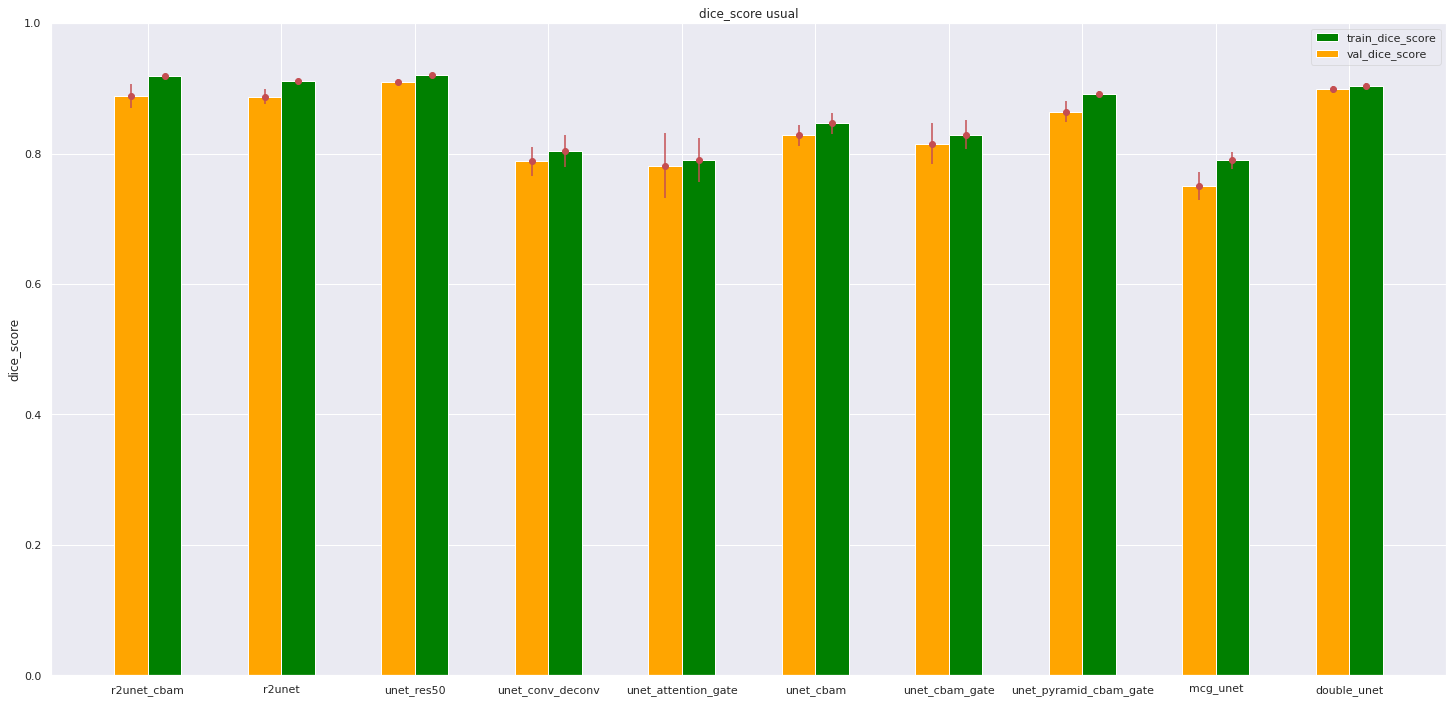

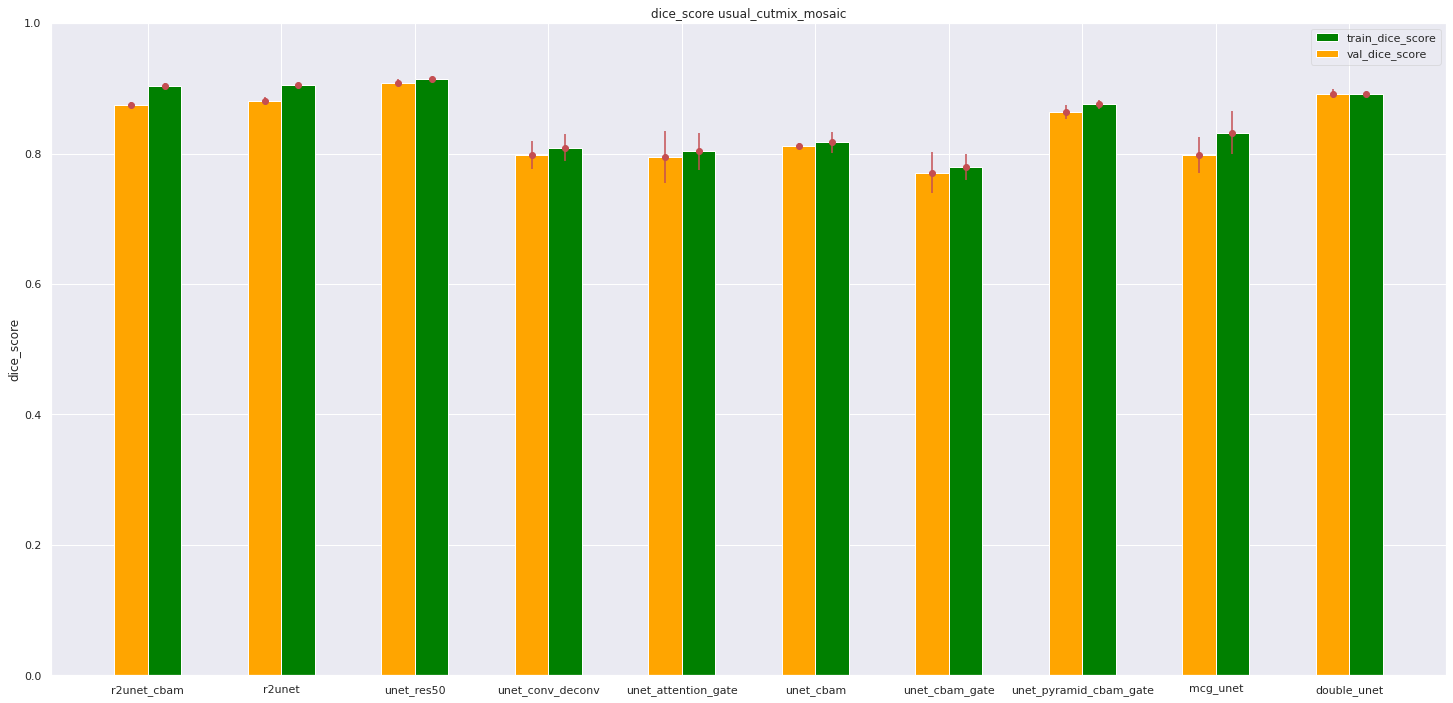

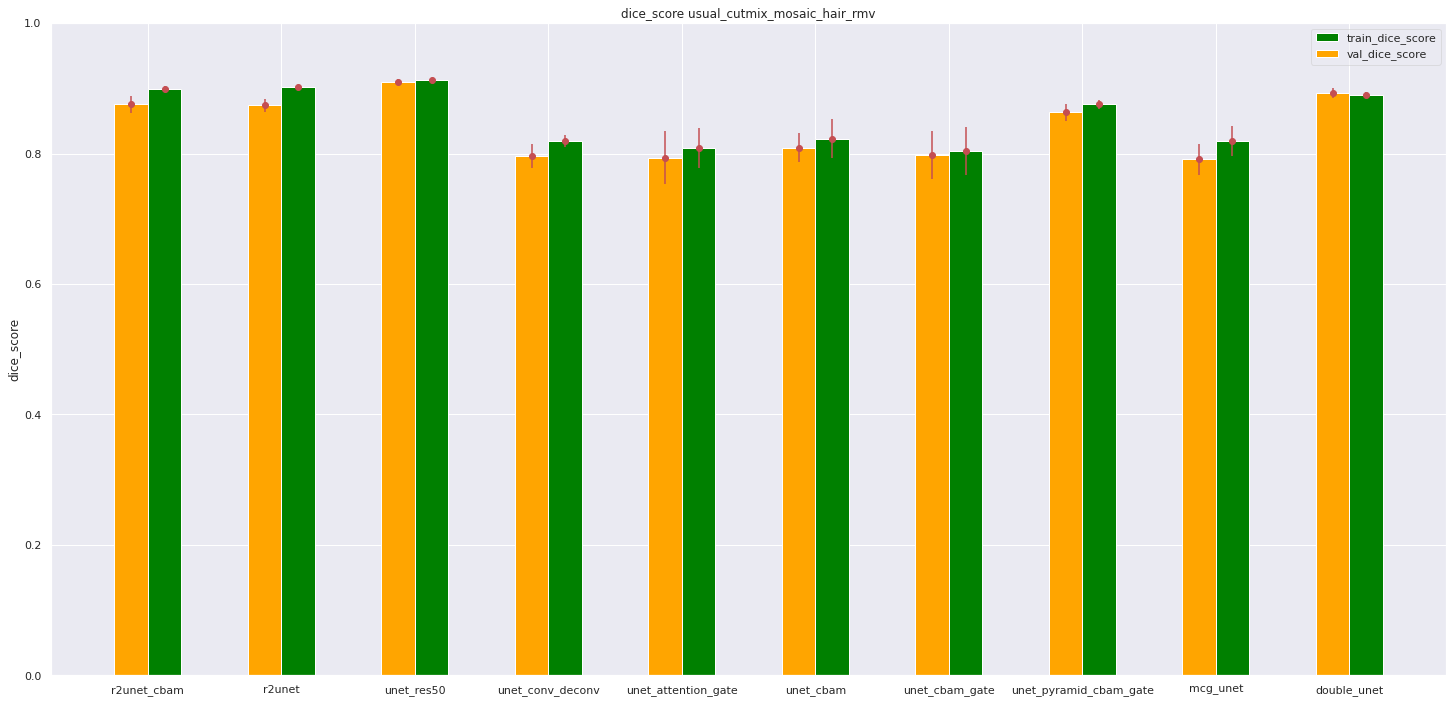

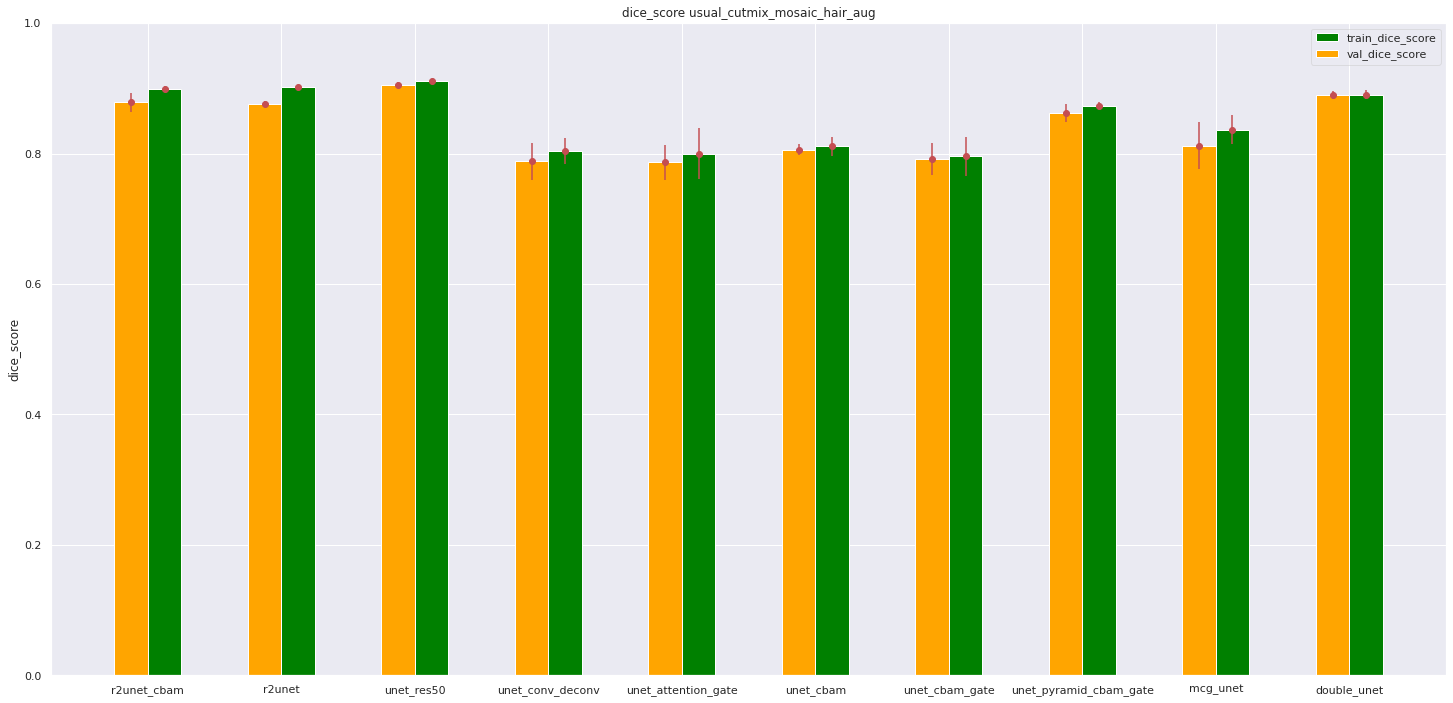

In [10]:
csv_paths = defaultdict(list)
for model in model_names:
  for train_identifier in train_identifiers:
    model_path = os.path.join(save_path, dataset_name, model)
    csv_path = save_print_mean_std(save_path, dataset_name, model, train_identifier, multi_train, metrics_names, metrics_operators, model_path)
    csv_paths[(model, train_identifier)].append(csv_path)

reterived_metrics = ["dice_score", "val_dice_score"]
indices = defaultdict(list)
values = defaultdict(list)
for (model, train_identifier), csv_path in csv_paths.items():
  res_dict = get_val(csv_path[0], reterived_metrics)
  indices[train_identifier].append(model)
  values[train_identifier].append(list(res_dict.values()))
  print(model, train_identifier, res_dict)

for (train_identifier, val), (_, ind) in zip(values.items(), indices.items()):
  df = pd.DataFrame(val, index=ind, columns=list(res_dict.keys()))
  grouped_mean_std_bar_plot(x_names=list(df.index),
                          mean=df[['mean_dice_score', 'mean_val_dice_score']].values.T,
                          std=df[['std_dice_score', 'std_val_dice_score']].values.T,
                          legends=["train_dice_score", "val_dice_score"],
                          title="dice_score " + train_identifier,
                          ylabel="dice_score",
                          save_path="dice_score " + train_identifier + ".jpg")
  # plot = df.plot.bar(title="dice_score " + train_identifier, figsize=(12, 8))
  # plot.figure.savefig( train_identifier + ".jpg", bbox_inches='tight')


# Get line graphs

In [11]:
csv_paths = defaultdict(list)
for model in model_names:
  for aug_type in train_identifiers:
    for n in range(multi_train):
      csv_paths[(model, aug_type)].append(os.path.join(save_path, dataset_name, model, train_identifier + f"_{n}", "exp_1", "csv_logger_train.csv"))



In [12]:
def extend_inputs(df, length=60):
  len_df = len(df)
  if len_df < length:
    new_values = df.values.tolist()
    for _ in range(length-len_df):
      new_val = new_values[-1].copy()
      new_val[0] += 1
      new_values.append(new_val)
    df = pd.DataFrame(new_values, columns=df.columns)
    # print(df)
  return df

In [13]:
columns = ['dice_score', 'val_dice_score']
values_dict = defaultdict(dict)
for (model_name, aug_type), csv_paths_lst in csv_paths.items():
  values = []
  for csv_path in csv_paths_lst:
    df = pd.read_csv(csv_path)
    df = extend_inputs(df)
    values.append(df[columns].values)
  values = np.array(values)
  std, mean = np.std(values, axis=0), np.mean(values, axis=0)
  values_dict[aug_type][model_name] = [std, mean]

In [14]:
MATPLOTLIB_COLORS = ["green", "orange", "blue", "black"]

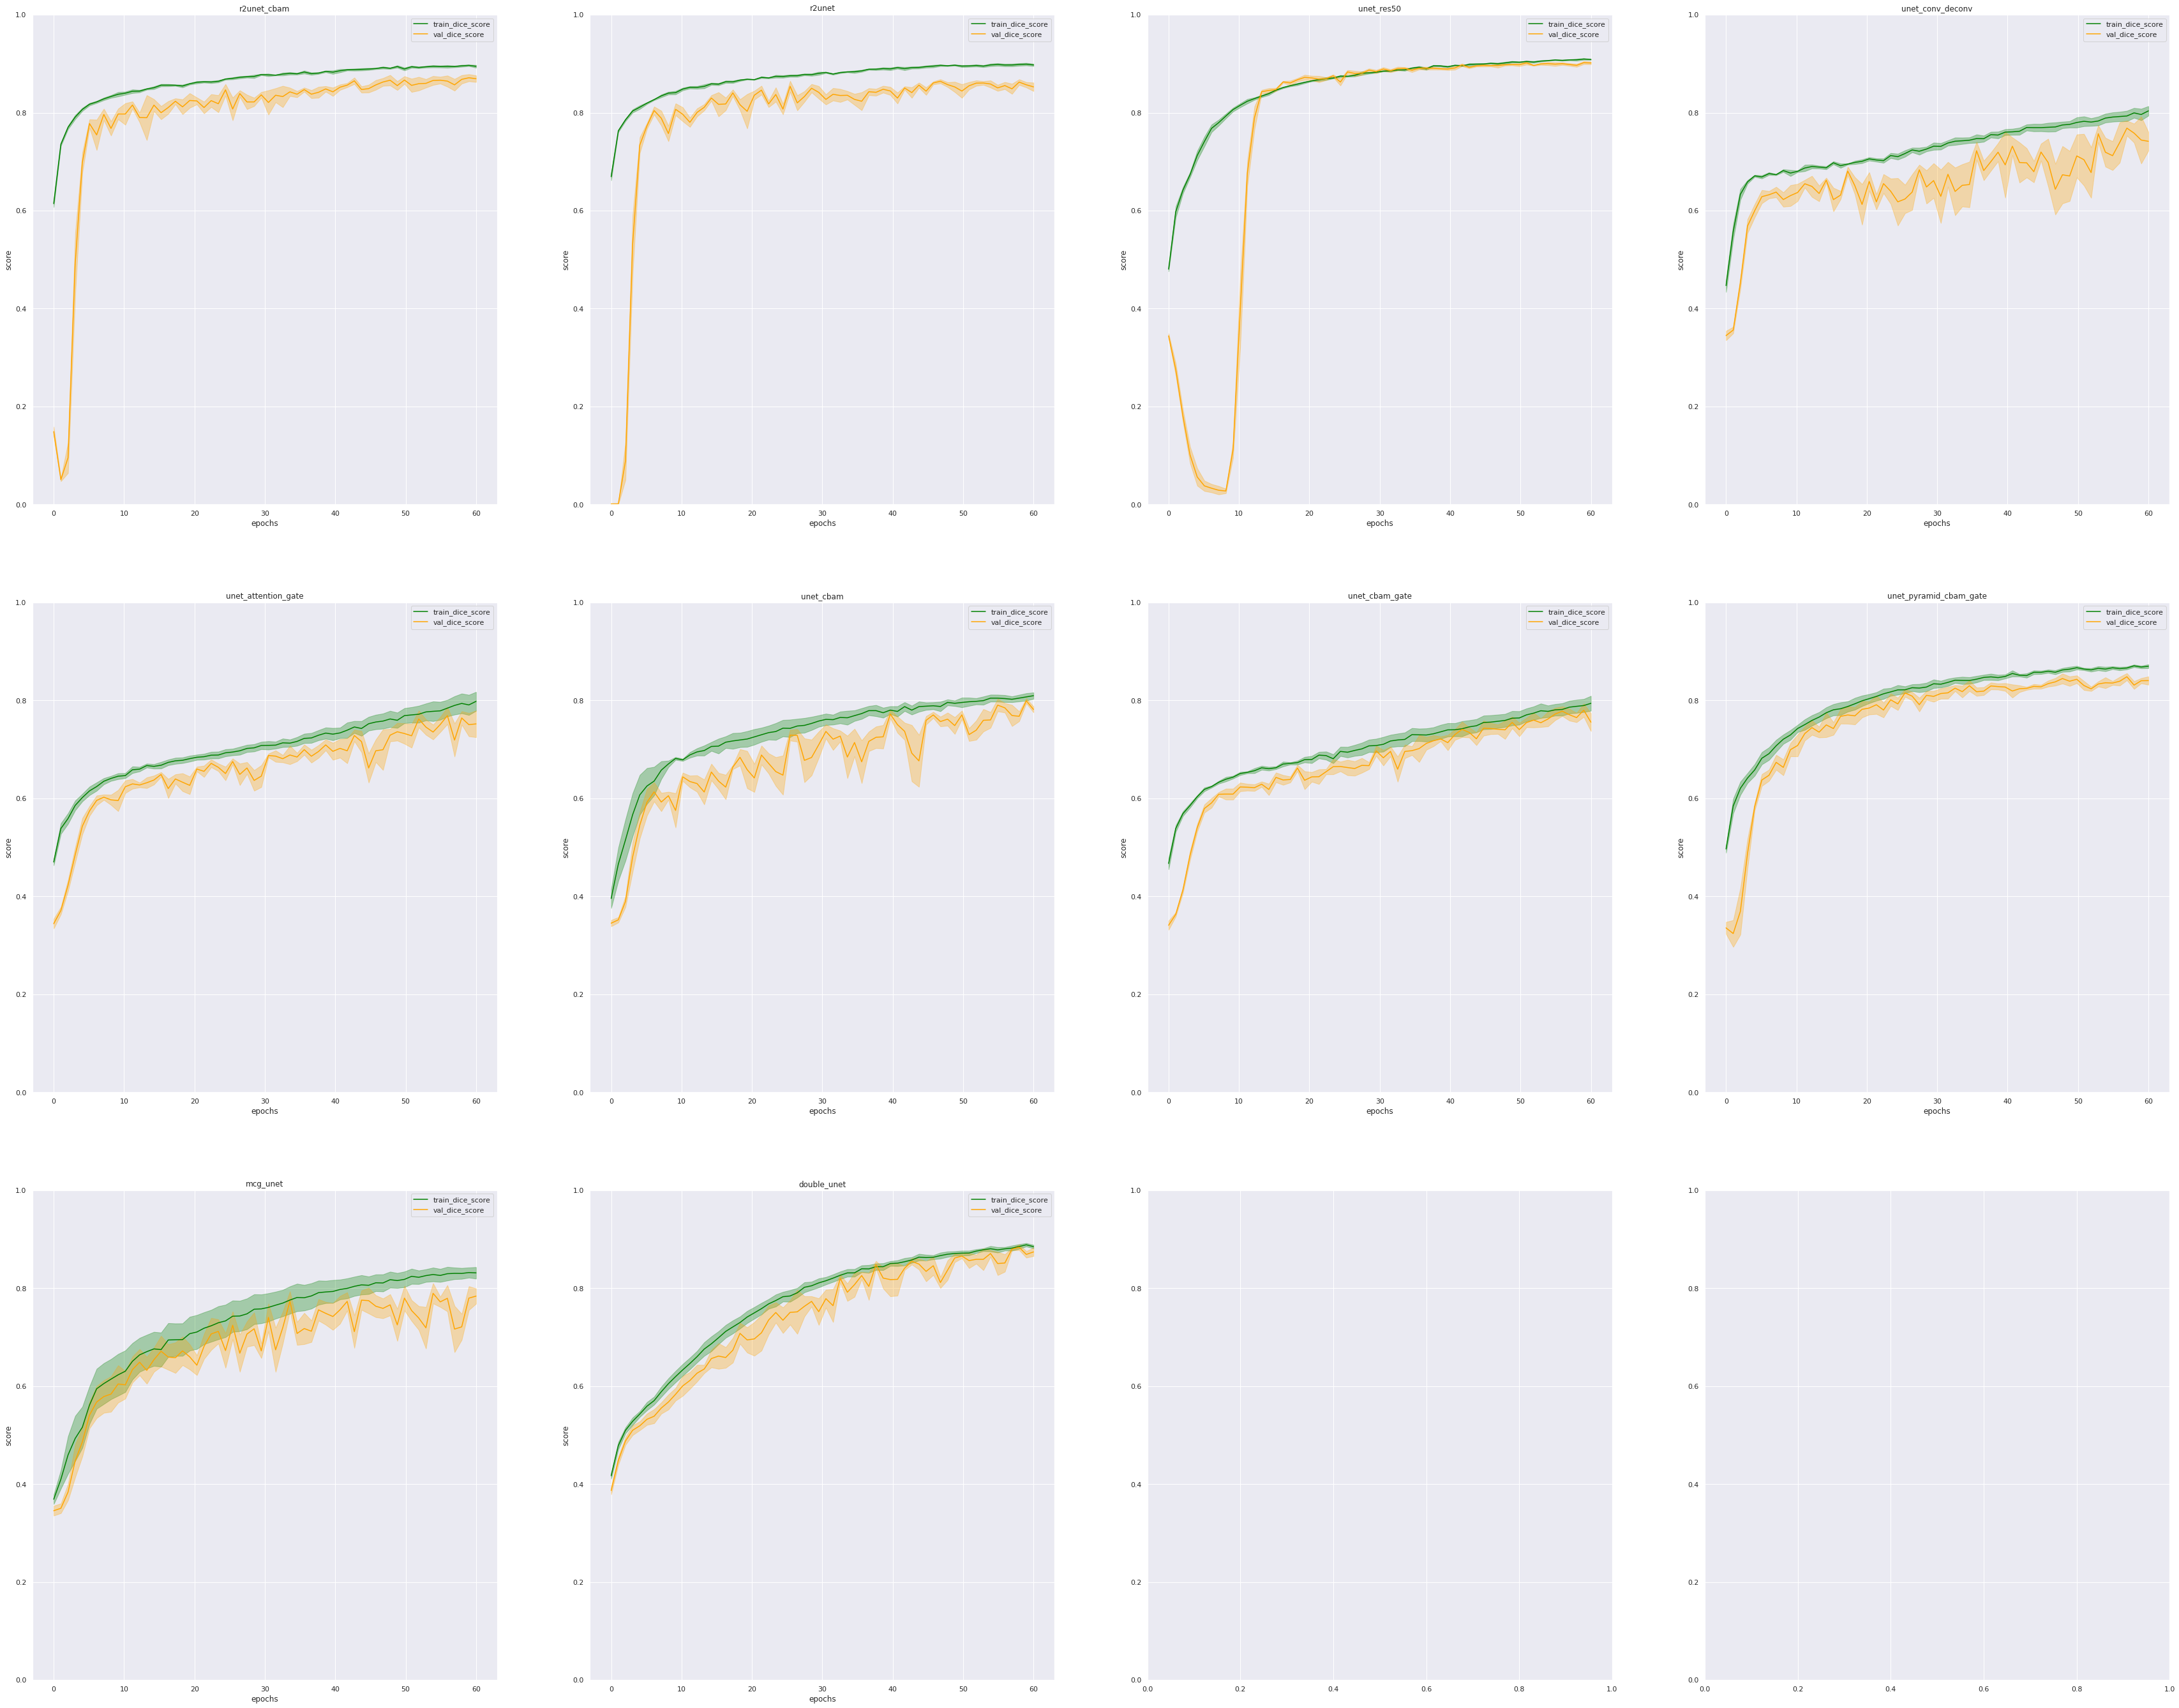

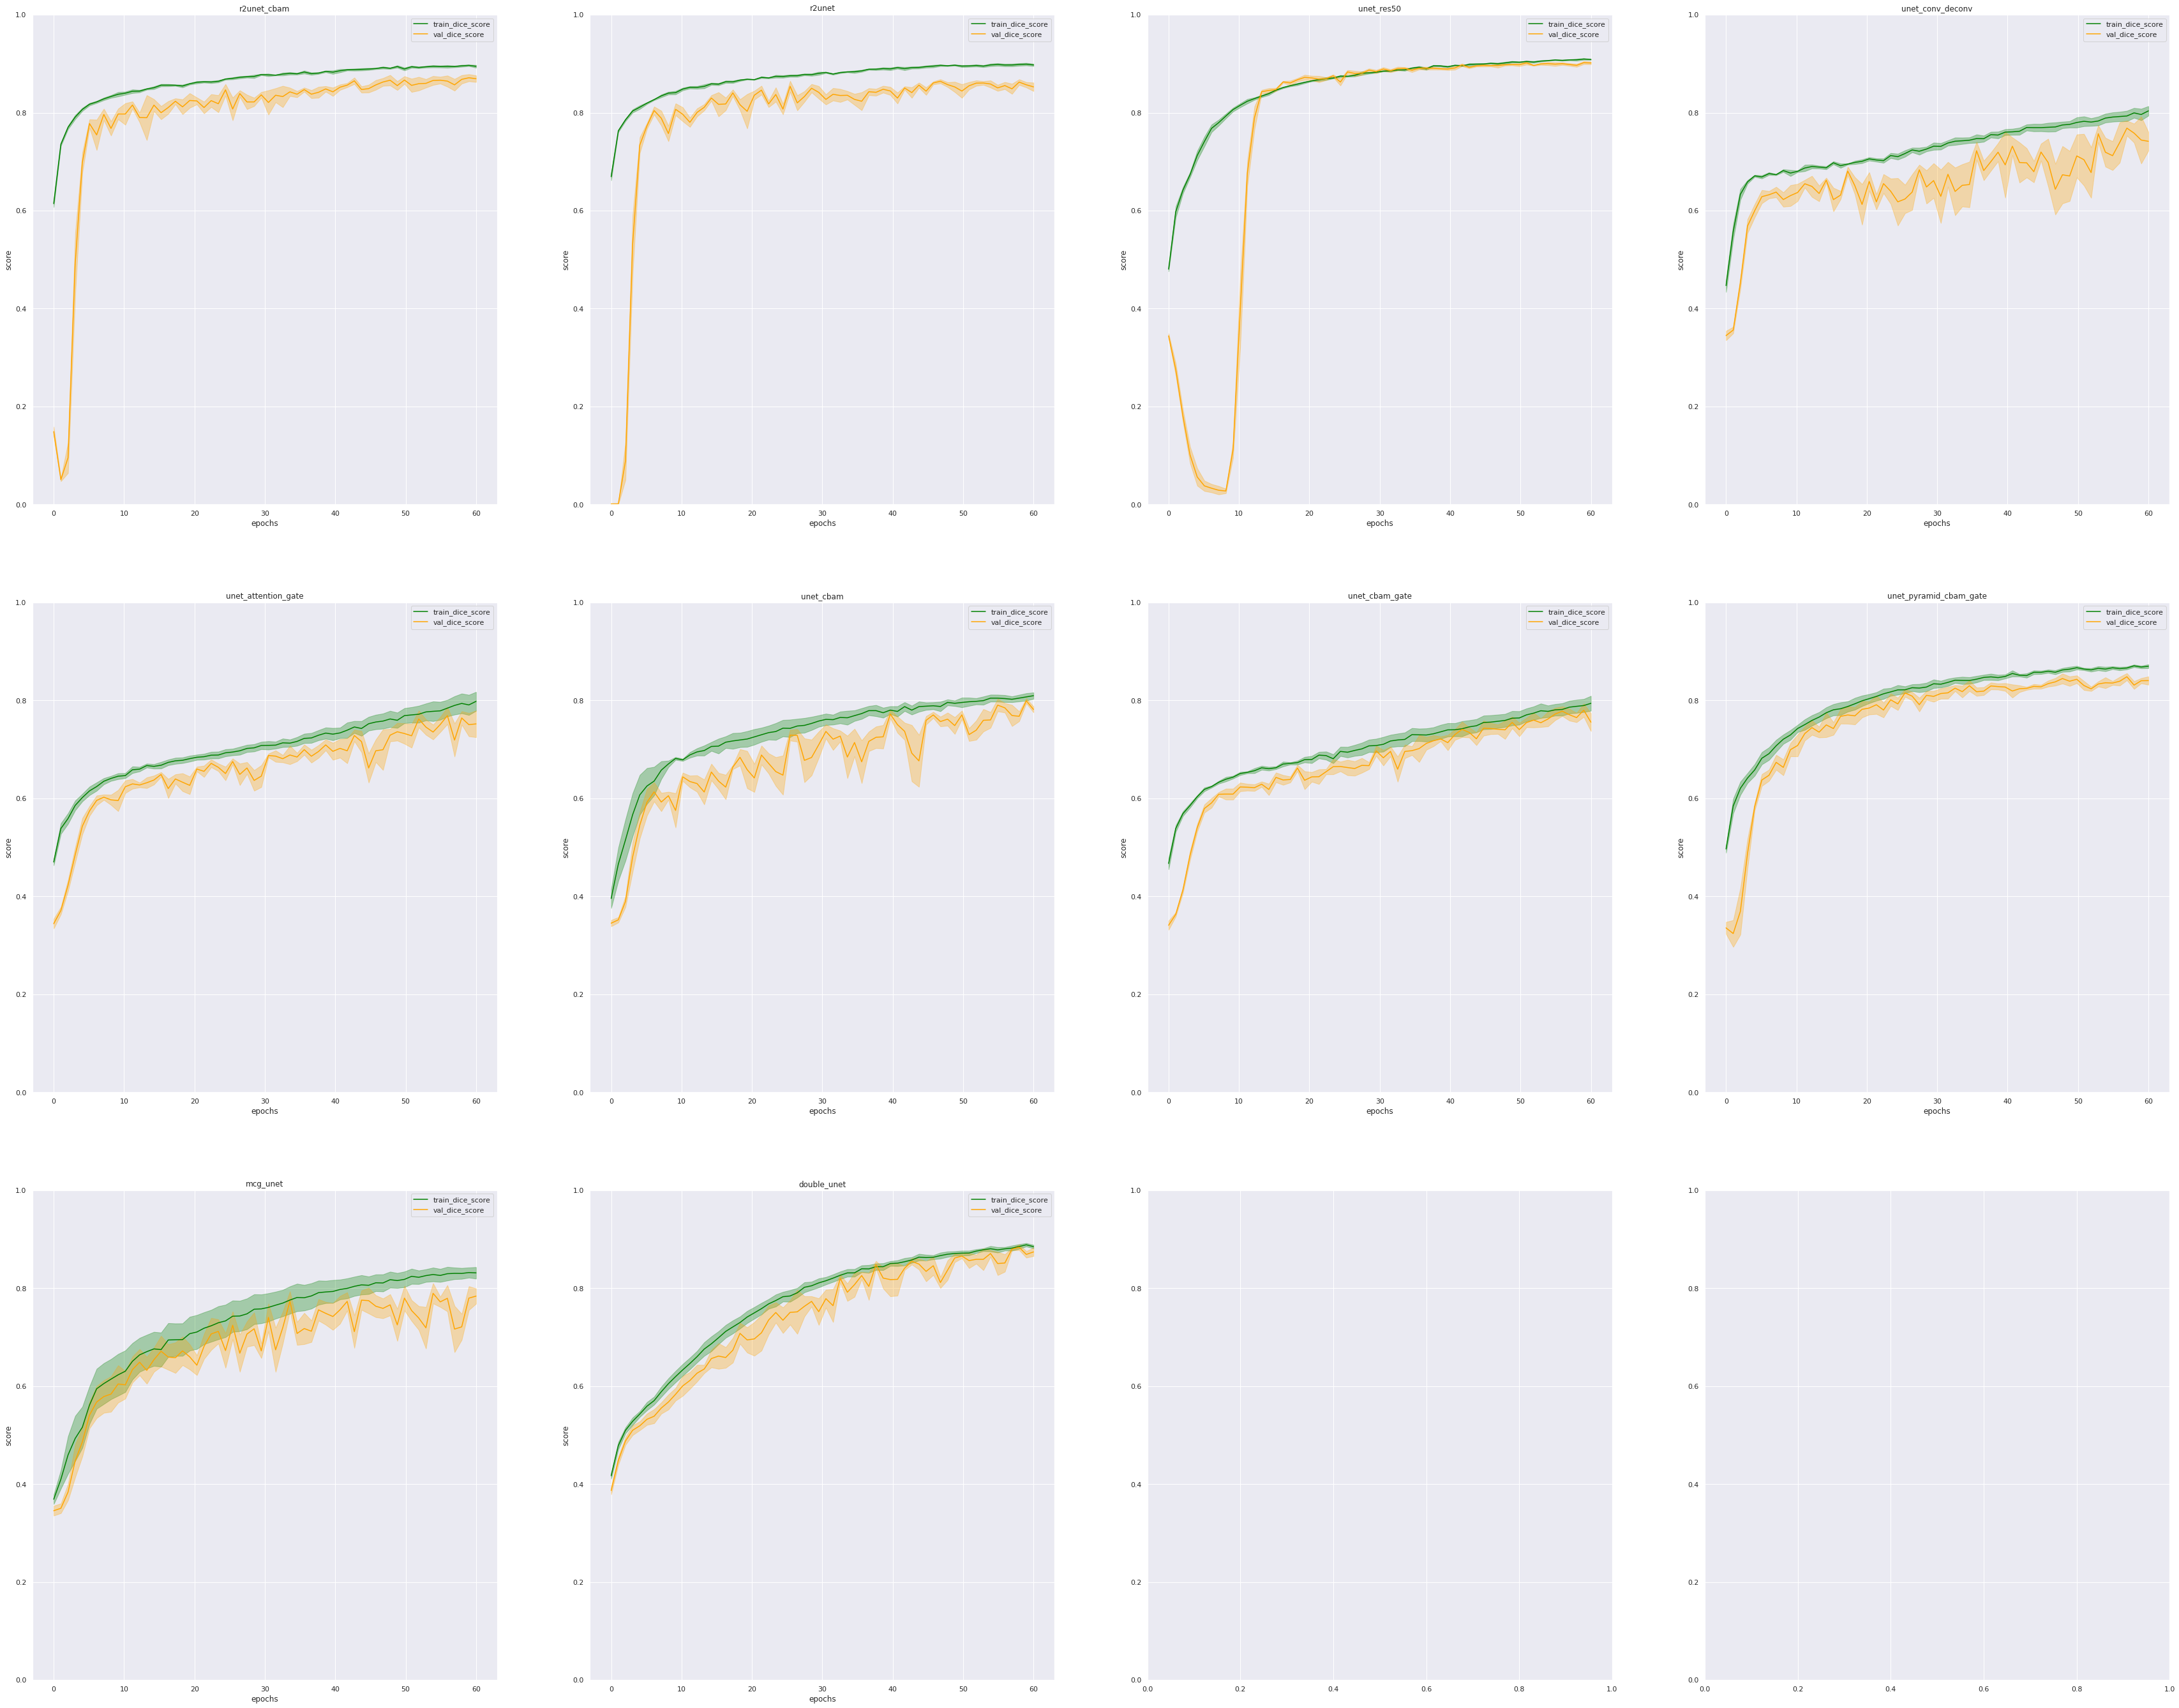

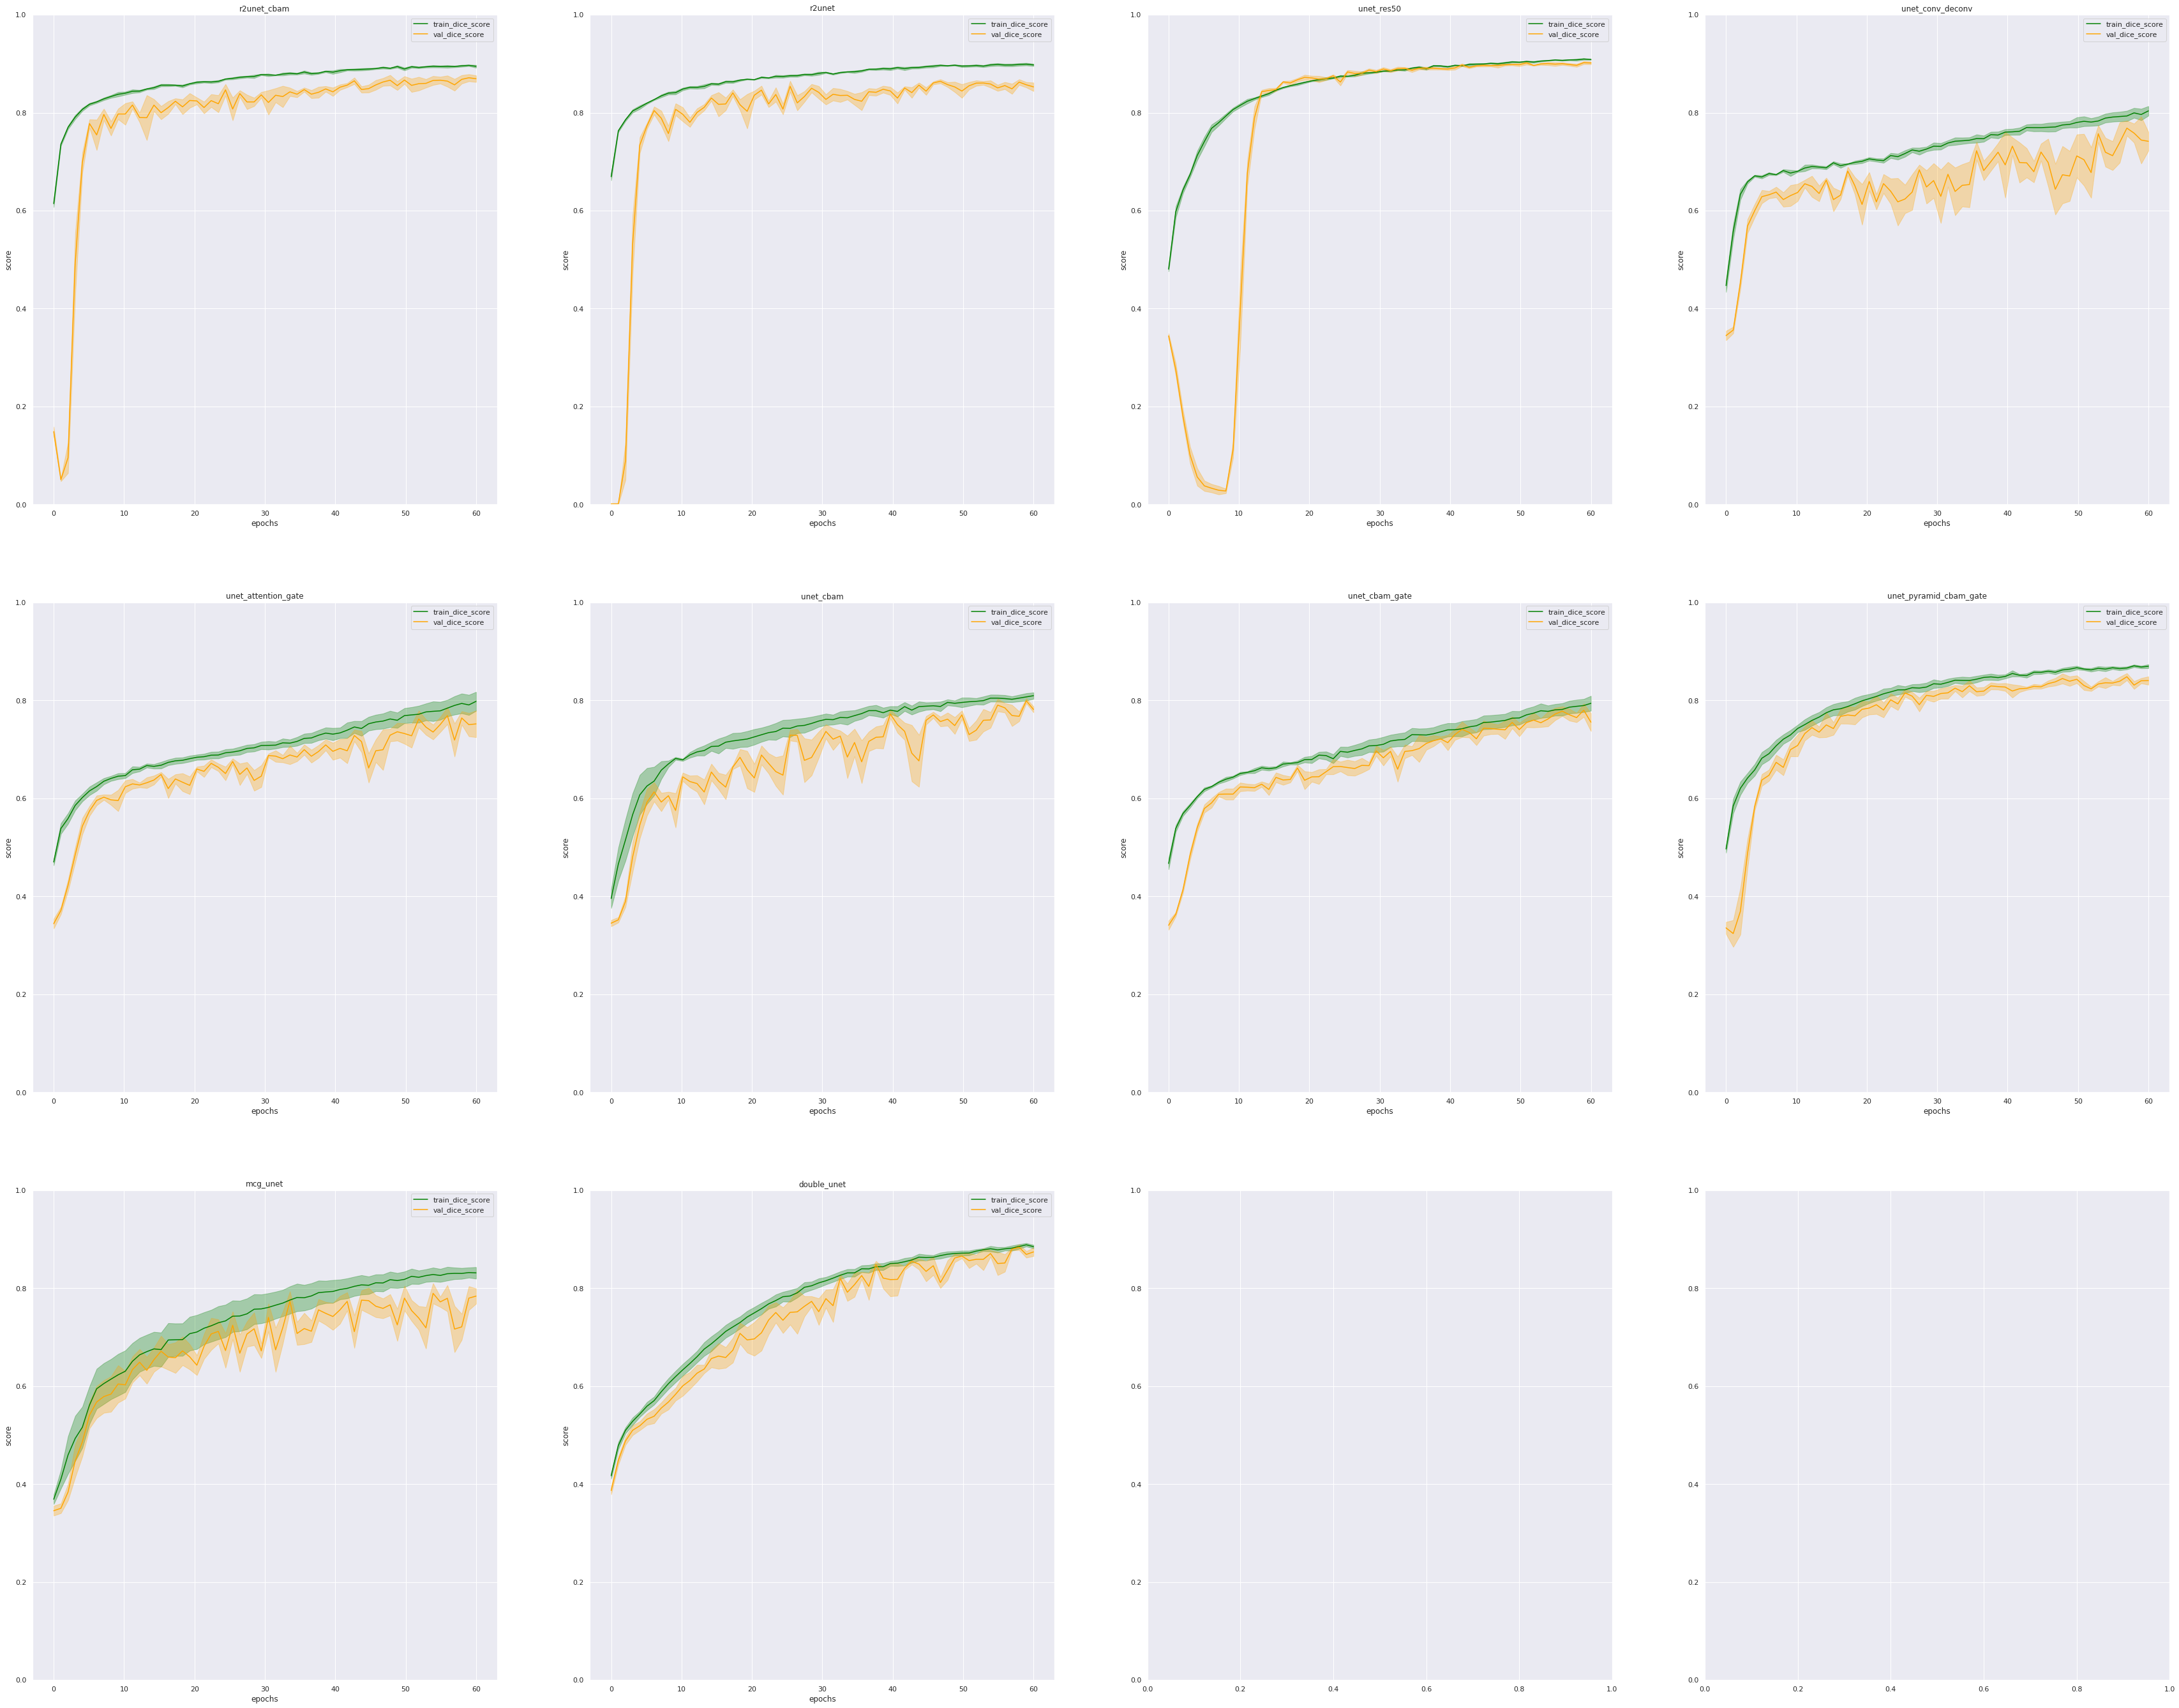

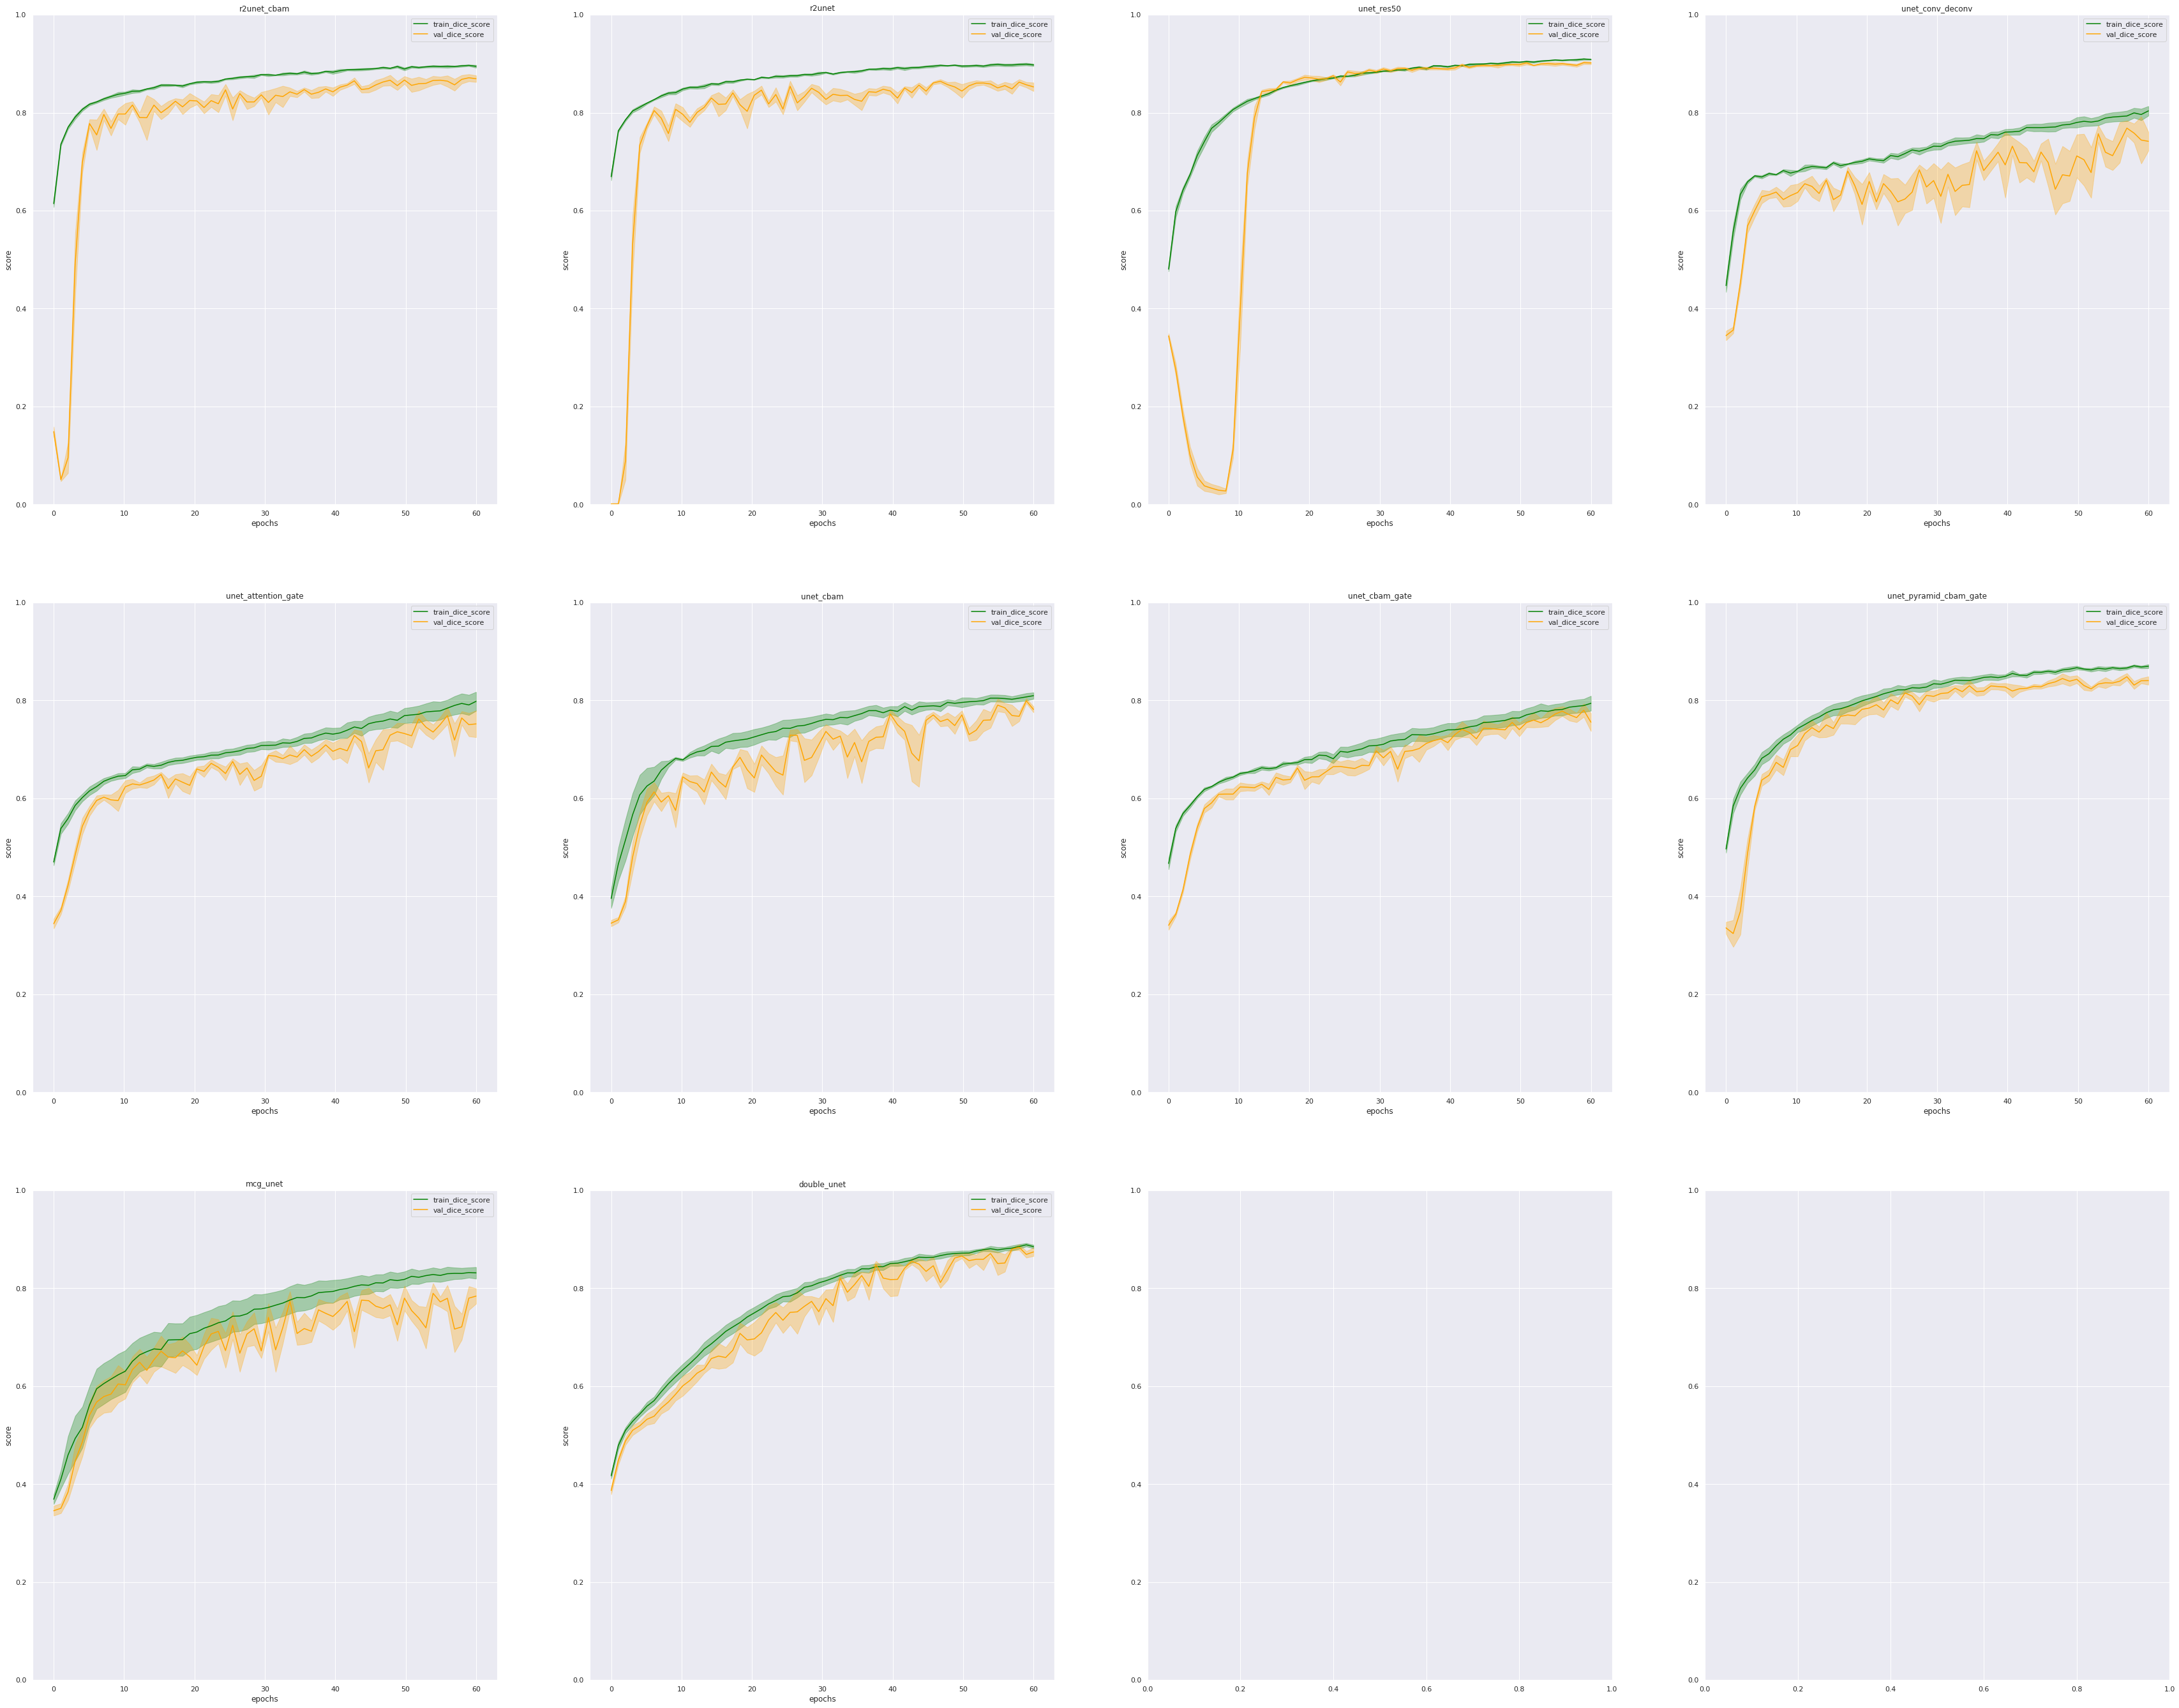

In [15]:
for aug, model_val_dict in values_dict.items():
  plot_numbers = len(model_val_dict)
  row = col = int(np.ceil(np.sqrt(plot_numbers)))
  while row * col >= plot_numbers:
    row = row - 1
  row += 1
  fig, axis = plt.subplots(row, col, figsize=(20 *  row , 12 * col) )
  for plt_index, (model_name, (std, mean)) in enumerate(model_val_dict.items()):
    r, c = plt_index//col, plt_index % col
    ax = axis[r, c] 
    for i, (m, s, n) in enumerate(zip(mean.T, std.T, ['train_dice_score', 'val_dice_score'])):
      n_samples = m.shape[0]
      x = np.linspace(0, n_samples, n_samples)
      error = s/2
      y = m
      ax.plot(x, y, MATPLOTLIB_COLORS[i], label=n)
      ax.fill_between(x, y-error, y+error, color=MATPLOTLIB_COLORS[i], alpha=0.3)
    ax.set_ylim((0, 1))
    ax.set_xlabel("epochs")
    ax.set_ylabel("score")
    ax.legend()
    ax.set_title(model_name)
  # plt.title(aug)
  plt.savefig(f"{aug}.jpg", bbox_inches='tight', dpi=300)
  plt.show()

## Get threshold reach

In [16]:
threshold = 0.80

In [26]:
def get_first_epoch(df, t):
    for row in df.values:
        if row[9] > t:
            return row[0]
    return -1

csv_paths_dict = defaultdict(list)
for model in model_names:
    for aug_type in train_identifiers:
        for n in range(multi_train):
            csv_paths_dict[(model, aug_type)].append(os.path.join(save_path, dataset_name, model, train_identifier + f"_{n}", "exp_1", "csv_logger_train.csv"))

get_threshold = dict()
for (model, aug_type), csv_path_lst in csv_paths_dict.items():
    epochs = []
    for csv_path in csv_path_lst:
        df = pd.read_csv(csv_path)
        epochs.append(get_first_epoch(df, threshold))
    non_reach = 0
    while -1 in epochs:
        epochs.remove(-1)
        non_reach += 1
    get_threshold[(model, aug_type)] = (np.mean(epochs), np.std(epochs), non_reach)

In [63]:
print(f"threshold: {threshold}")
df = pd.DataFrame(get_threshold.values(), index=get_threshold.keys(), columns=['mean-epoch', 'std-epoch', 'failures'])
df.to_csv(f"saved_models/threshold_{threshold}.csv")
df

threshold: 0.8


mean-epoch  std-epoch  \
r2unet_cbam            usual                           8.800000   1.469694   
                       usual_cutmix_mosaic             8.800000   1.469694   
                       usual_cutmix_mosaic_hair_rmv    8.800000   1.469694   
                       usual_cutmix_mosaic_hair_aug    8.800000   1.469694   
r2unet                 usual                           7.800000   3.124100   
                       usual_cutmix_mosaic             7.800000   3.124100   
                       usual_cutmix_mosaic_hair_rmv    7.800000   3.124100   
                       usual_cutmix_mosaic_hair_aug    7.800000   3.124100   
unet_res50             usual                          12.600000   0.489898   
                       usual_cutmix_mosaic            12.600000   0.489898   
                       usual_cutmix_mosaic_hair_rmv   12.600000   0.489898   
                       usual_cutmix_mosaic_hair_aug   12.600000   0.489898   
unet_conv_deconv       usual                          56.666667   1.247219   
                       usual_cutmix_mosaic            56.666667   1.247219   
                       usual_cutmix_mosaic_hair_rmv   56.666667   1.247219   
                       usual_cutmix_mosaic_hair_aug   56.666667   1.247219   
unet_attention_gate    usual                          54.500000   3.500000   
                       usual_cutmix_mosaic            54.500000   3.500000   
                       usual_cutmix_mosaic_hair_rmv   54.500000   3.500000   
                       usual_cutmix_mosaic_hair_aug   54.500000   3.500000   
unet_cbam              usual                          55.000000   2.236068   
                       usual_cutmix_mosaic            55.000000   2.236068   
                       usual_cutmix_mosaic_hair_rmv   55.000000   2.236068   
                       usual_cutmix_mosaic_hair_aug   55.000000   2.236068   
unet_cbam_gate         usual                          56.000000   1.632993   
                       usual_cutmix_mosaic            56.000000   1.632993   
                       usual_cutmix_mosaic_hair_rmv   56.000000   1.632993   
                       usual_cutmix_mosaic_hair_aug   56.000000   1.632993   
unet_pyramid_cbam_gate usual                          22.800000   7.304793   
                       usual_cutmix_mosaic            22.800000   7.304793   
                       usual_cutmix_mosaic_hair_rmv   22.800000   7.304793   
                       usual_cutmix_mosaic_hair_aug   22.800000   7.304793   
mcg_unet               usual                          39.000000   6.442049   
                       usual_cutmix_mosaic            39.000000   6.442049   
                       usual_cutmix_mosaic_hair_rmv   39.000000   6.442049   
                       usual_cutmix_mosaic_hair_aug   39.000000   6.442049   
double_unet            usual                          27.800000   3.867816   
                       usual_cutmix_mosaic            27.800000   3.867816   
                       usual_cutmix_mosaic_hair_rmv   27.800000   3.867816   
                       usual_cutmix_mosaic_hair_aug   27.800000   3.867816   

                                                     failures  
r2unet_cbam            usual                                0  
                       usual_cutmix_mosaic                  0  
                       usual_cutmix_mosaic_hair_rmv         0  
                       usual_cutmix_mosaic_hair_aug         0  
r2unet                 usual                                0  
                       usual_cutmix_mosaic                  0  
                       usual_cutmix_mosaic_hair_rmv         0  
                       usual_cutmix_mosaic_hair_aug         0  
unet_res50             usual                                0  
                       usual_cutmix_mosaic                  0  
                       usual_cutmix_mosaic_hair_rmv         0  
                       usual_cutmix_mosaic_hair_aug         0  
unet_conv_deconv      

In [65]:
mean_df = df.reset_index().groupby("level_0").mean().round(1)
mean_df.index = [lbls2lbls[l] for l in mean_df.index]
mean_df.index.name = ""
mean_df.head()
print(mean_df.to_latex(index=True, caption=f"Models's first epoch number in which they pass the dice-score of 0.8",
                  label=f'table:learning speed'))

\begin{table}
\centering
\caption{Models's first epoch number in which they pass the dice-score of 0.8}
\label{table:learning speed}
\begin{tabular}{lrrr}
\toprule
{} &  mean-epoch &  std-epoch &  failures \\
     &             &            &           \\
\midrule
DU   &        27.8 &        3.9 &       0.0 \\
MCGU &        39.0 &        6.4 &       1.0 \\
R2U  &         7.8 &        3.1 &       0.0 \\
R2UC &         8.8 &        1.5 &       0.0 \\
UAG  &        54.5 &        3.5 &       3.0 \\
UC   &        55.0 &        2.2 &       1.0 \\
UCG  &        56.0 &        1.6 &       2.0 \\
UCD  &        56.7 &        1.2 &       2.0 \\
UPCG &        22.8 &        7.3 &       0.0 \\
UR50 &        12.6 &        0.5 &       0.0 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_26752/3510479617.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mean_df.to_latex(index=True, caption=f"Models's first epoch number in which they pass the dice-score of 0.8",


## highest score after 10 epochs

In [19]:
def get_epoch_score(df, epoch):
    val = (df[df['epoch'] <= epoch]['val_dice_score']).max()
    return val

csv_paths_dict = defaultdict(list)
for model in model_names:
    for aug_type in train_identifiers:
        for n in range(multi_train):
            csv_paths_dict[(model, aug_type)].append(os.path.join(save_path, dataset_name, model, train_identifier + f"_{n}", "exp_1", "csv_logger_train.csv"))


get_max_epoch_score = defaultdict(list)
columns = []

def get_epoch_score_main(res_dict, columns, epoch):
    for (model, aug_type), csv_path_lst in csv_paths_dict.items():
        values = []
        for csv_path in csv_path_lst:
            df = pd.read_csv(csv_path)
            val = get_epoch_score(df, epoch)
            values.append(val)
        res_dict[(model, aug_type)].extend([np.mean(values), np.std(values)])
    columns.extend([f"mean-max-score-{epoch}", f"std-max-score-{epoch}"])
for epoch in [10, 20, 30, 40, 50]:
    get_epoch_score_main(get_max_epoch_score, columns, epoch)

In [20]:
columns

['mean-max-score-10',
 'std-max-score-10',
 'mean-max-score-20',
 'std-max-score-20',
 'mean-max-score-30',
 'std-max-score-30',
 'mean-max-score-40',
 'std-max-score-40',
 'mean-max-score-50',
 'std-max-score-50']

In [21]:
df = pd.DataFrame(get_max_epoch_score.values(), index=get_max_epoch_score.keys(), columns=columns)
df.to_csv(f"saved_models/epoch_score.csv")
df

mean-max-score-10  \
r2unet_cbam            usual                                  0.821471   
                       usual_cutmix_mosaic                    0.821471   
                       usual_cutmix_mosaic_hair_rmv           0.821471   
                       usual_cutmix_mosaic_hair_aug           0.821471   
r2unet                 usual                                  0.818876   
                       usual_cutmix_mosaic                    0.818876   
                       usual_cutmix_mosaic_hair_rmv           0.818876   
                       usual_cutmix_mosaic_hair_aug           0.818876   
unet_res50             usual                                  0.431748   
                       usual_cutmix_mosaic                    0.431748   
                       usual_cutmix_mosaic_hair_rmv           0.431748   
                       usual_cutmix_mosaic_hair_aug           0.431748   
unet_conv_deconv       usual                                  0.666095   
                       usual_cutmix_mosaic                    0.666095   
                       usual_cutmix_mosaic_hair_rmv           0.666095   
                       usual_cutmix_mosaic_hair_aug           0.666095   
unet_attention_gate    usual                                  0.624429   
                       usual_cutmix_mosaic                    0.624429   
                       usual_cutmix_mosaic_hair_rmv           0.624429   
                       usual_cutmix_mosaic_hair_aug           0.624429   
unet_cbam              usual                                  0.655979   
                       usual_cutmix_mosaic                    0.655979   
                       usual_cutmix_mosaic_hair_rmv           0.655979   
                       usual_cutmix_mosaic_hair_aug           0.655979   
unet_cbam_gate         usual                                  0.625460   
                       usual_cutmix_mosaic                    0.625460   
                       usual_cutmix_mosaic_hair_rmv           0.625460   
                       usual_cutmix_mosaic_hair_aug           0.625460   
unet_pyramid_cbam_gate usual                                  0.720904   
                       usual_cutmix_mosaic                    0.720904   
                       usual_cutmix_mosaic_hair_rmv           0.720904   
                       usual_cutmix_mosaic_hair_aug           0.720904   
mcg_unet               usual                                  0.618520   
                       usual_cutmix_mosaic                    0.618520   
                       usual_cutmix_mosaic_hair_rmv           0.618520   
                       usual_cutmix_mosaic_hair_aug           0.618520   
double_unet            usual                                  0.604126   
                       usual_cutmix_mosaic                    0.604126   
                       usual_cutmix_mosaic_hair_rmv           0.604126   
                       usual_cutmix_mosaic_hair_aug           0.604126   

                                                     std-max-score-10  \
r2unet_cbam            usual                                 0.010768   
                       usual_cutmix_mosaic                   0.010768   
                       usual_cutmix_mosaic_hair_rmv          0.010768   
                       usual_cutmix_mosaic_hair_aug          0.010768   
r2unet                 usual                                 0.017215   
                       usual_cutmix_mosaic                   0.017215   
                       usual_cutmix_mosaic_hair_rmv          0.017215   
                       usual_cutmix_mosaic_hair_aug          0.017215   
unet_res50             usual                                 0.112224   
                       usual_cutmix_mosaic                   0.112224   
                       usual_cutmix_mosaic_hair_rmv          0.112224   
                       usual_cutmix_mosaic_hair_aug          0.112224   
unet_conv_deconv       usual                                 0.017022

# Get full Data

In [24]:
# models, augmenations, train_val, loss-functions, 5 trials, 60 epochs
from collections import OrderedDict
csv_paths_dict = OrderedDict()
for model in model_names:
    for aug_type in train_identifiers:
        for n in range(multi_train):
            csv_paths_dict[(model, aug_type, n)] = os.path.join(save_path, dataset_name, model, aug_type + f"_{n}", "exp_1", "csv_logger_train.csv")

values = OrderedDict()

for (model_name, aug_type, n), csv_path in csv_paths_dict.items():
    df = pd.read_csv(csv_path)
    for col in df.columns:
        if col in  ['lr', 'epoch']: continue
        val = df[col].values.tolist()
        while len(val) < 60:
            val.append(val[-1])
        values[(model_name, aug_type, n, col)] = val

In [25]:
df = pd.DataFrame(values.values(), index=values.keys(), columns=[str(n) for n in range(60)])
df.index.names = ["model_name", "augmentation", "trial", "loss-function"]
df.to_csv(f"saved_models/full_data.csv")
df

0  \
model_name  augmentation                 trial loss-function                      
r2unet_cbam usual                        0     dice_loss               0.411666   
                                               dice_score              0.588334   
                                               focal_tversky_loss      0.452934   
                                               iou                     0.427835   
                                               jaccard_loss            0.464149   
...                                                                         ...   
double_unet usual_cutmix_mosaic_hair_aug 4     val_dice_score          0.361668   
                                               val_focal_tversky_loss  0.682716   
                                               val_iou                 0.221834   
                                               val_jaccard_loss        0.615611   
                                               val_loss                0.638332   

                                                                              1  \
model_name  augmentation                 trial loss-function                      
r2unet_cbam usual                        0     dice_loss               0.252512   
                                               dice_score              0.747488   
                                               focal_tversky_loss      0.329765   
                                               iou                     0.603250   
                                               jaccard_loss            0.333697   
...                                                                         ...   
double_unet usual_cutmix_mosaic_hair_aug 4     val_dice_score          0.428784   
                                               val_focal_tversky_loss  0.619852   
                                               val_iou                 0.274612   
                                               val_jaccard_loss        0.532847   
                                               val_loss                0.571216   

                                                                              2  \
model_name  augmentation                 trial loss-function                      
r2unet_cbam usual                        0     dice_loss               0.210371   
                                               dice_score              0.789629   
                                               focal_tversky_loss      0.301506   
                                               iou                     0.658106   
                                               jaccard_loss            0.296229   
...                                                                         ...   
double_unet usual_cutmix_mosaic_hair_aug 4     val_dice_score          0.482032   
                                               val_focal_tversky_loss  0.560719   
                                               val_iou                 0.320482   
                                               val_jaccard_loss        0.484898   
                                               val_loss                0.517968   

                                                                              3  \
model_name  augmentation                 trial loss-function                      
r2unet_cbam usual                        0     dice_loss               0.185754   
                                               dice_score              0.814246   
                                               focal_tversky_loss      0.278986   
                                               iou                     0.692209   
                                               jaccard_loss            0.272057   
...                                                                         ...   
double_unet usual_cutmix_mosaic_hair_aug 4     val_dice_score          0.493854   
                                               val_focal_tversky_loss  0.542318   
        

## Get Model params and Size

In [1]:
from tensorflow.keras import backend as K
import numpy as np
from models import load_model
import pandas as pd


model_names = [
    'r2unet_cbam',
    'r2unet',
    'unet_res50',
    'unet_conv_deconv',
    'unet_attention_gate', # This model is not deterministic
    'unet_cbam',
    'unet_cbam_gate',
    'unet_pyramid_cbam_gate',
    "mcg_unet",
    'double_unet',
    ]
img_size = (256, 256)

def get_model_memory_usage(batch_size, model):
    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

In [2]:
batch_size = 1
model_information = dict()
for model_name in model_names:
    model = load_model(model_name=model_name, img_w=img_size[0], img_h=img_size[1])
    model_size = get_model_memory_usage(batch_size, model)
    trainable_count = int(np.sum([K.count_params(p) for p in model.trainable_weights]))
    non_trainable_count = int(np.sum([K.count_params(p) for p in model.non_trainable_weights]))
    model_information[model_name] = [model_size, model.count_params(), trainable_count, non_trainable_count]
df = pd.DataFrame(model_information.values(), index=list(model_information.keys()), columns=['size[GB]', "total-params", "trainable-params", "non-trainable-params"])
df.index.name = "model-name"
df.to_csv("saved_models/models_general_info.csv")
df

2022-05-05 10:57:17.838800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 10:57:17.877497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 10:57:17.877851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 10:57:17.879118: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[INFO] model: r2unet_cbam is successfully loaded!
[INFO] model: r2unet is successfully loaded!
[INFO] model: unet_res50 is successfully loaded!
[INFO] model: unet_conv_deconv is successfully loaded!
[INFO] model: unet_attention_gate is successfully loaded!
[INFO] model: unet_cbam is successfully loaded!
[INFO] model: unet_cbam_gate is successfully loaded!
[INFO] model: unet_pyramid_cbam_gate is successfully loaded!
[INFO] model: mcg_unet is successfully loaded!
[INFO] model: double_unet is successfully loaded!


,size[GB],total-params,trainable-params,non-trainable-params
model-name,,,,
r2unet_cbam,1.710,25405855,25388063,17792
r2unet,1.943,96056705,96021377,35328
unet_res50,0.494,20676545,20642113,34432
unet_conv_deconv,0.192,7727009,7725089,1920
unet_attention_gate,0.126,849316,847076,2240
unet_cbam,0.223,7749701,7747781,1920
unet_cbam_gate,0.132,852094,849854,2240
unet_pyramid_cbam_gate,0.269,4377520,4372272,5248
mcg_unet,0.267,1681105,1678993,2112


### Get size by model.h5

In [25]:
import os
import tensorflow as tf
import pandas as pd 

batch_size = 1
model_information = dict()
for model_name in model_names:
    model = load_model(model_name=model_name, img_w=img_size[0], img_h=img_size[1])
    file_path = f"saved_models/ISIC_2016/{model_name}/{model_name}.h5"
    model.save_weights(file_path)
    model_size = round(os.path.getsize(file_path) / (1000**2), 1)
    trainable_count = int(np.sum([K.count_params(p) for p in model.trainable_weights]))
    non_trainable_count = int(np.sum([K.count_params(p) for p in model.non_trainable_weights]))
    model_information[model_name] = [model_size, round(model.count_params()/1e6,1), trainable_count, non_trainable_count]
df = pd.DataFrame(model_information.values(), index=list(model_information.keys()), columns=['size[MB]', "total-params[M]", "trainable-params", "non-trainable-params"])
df.index.name = "model-name"
df.to_csv("saved_models/models_general_info.csv")
df

[INFO] model: r2unet_cbam is successfully loaded!
[INFO] model: r2unet is successfully loaded!
[INFO] model: unet_res50 is successfully loaded!
[INFO] model: unet_conv_deconv is successfully loaded!
[INFO] model: unet_attention_gate is successfully loaded!
[INFO] model: unet_cbam is successfully loaded!
[INFO] model: unet_cbam_gate is successfully loaded!
[INFO] model: unet_pyramid_cbam_gate is successfully loaded!
[INFO] model: mcg_unet is successfully loaded!
[INFO] model: double_unet is successfully loaded!


,size[MB],total-params[M],trainable-params,non-trainable-params
model-name,,,,
r2unet_cbam,102.1,25.4,25388063,17792
r2unet,384.7,96.1,96021377,35328
unet_res50,83.1,20.7,20642113,34432
unet_conv_deconv,31.0,7.7,7725089,1920
unet_attention_gate,3.6,0.8,847076,2240
unet_cbam,31.2,7.7,7747781,1920
unet_cbam_gate,3.7,0.9,849854,2240
unet_pyramid_cbam_gate,17.8,4.4,4372272,5248
mcg_unet,6.9,1.7,1678993,2112


# Trying some models

In [18]:
import os
from os.path import join
import tensorflow as tf
import pandas as pd 
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np
from utils.loss import dice_loss, jaccard_loss, focal_tversky_loss, get_loss
from utils.metrics import dice_score, iou
from deep_utils import remove_create, mkdir_incremental
from tensorflow.keras import backend as K


test_dir = "data/test/"
mask_dir = "data/mask_test/"
weights_path = "saved_models/ISIC_2016/"
img_size = [256, 256]
image_path = mkdir_incremental("paper_images")


test_img_paths = sorted([os.path.join(test_dir, path) for path in os.listdir(test_dir)])
test_mask_paths = sorted([os.path.join(mask_dir, path) for path in os.listdir(mask_dir)])
indices = random.choices(list(range(len(test_img_paths))), k=60)
test_img_images =[cv2.resize(cv2.imread(img_path)[..., ::-1], img_size)  for img_path in [test_img_paths[i] for i in indices]]
test_mask_images = [cv2.resize(cv2.imread(img_path)[...,0], img_size) for img_path in [test_mask_paths[i] for i in indices]]

model_names = [
    'unet_res50',
    'r2unet',
    'r2unet_cbam',
    'unet_pyramid_cbam_gate',
    'double_unet',    
    ]

row = len(model_names) + 1
# plt.figure(40, 24)
for img_i, (img, test_mask) in enumerate(zip(test_img_images, test_mask_images)):
#     plt.subplot(len(test_images), row, img_i * row + 1)
#     plt.axis('off')
    cv2.imwrite(join(image_path, f"img_{img_i}.jpg"), img[..., ::-1])
    cv2.imwrite(join(image_path, f"mask_{img_i}.jpg"), test_mask)
    for model_i, model_name in enumerate(model_names):
#         model = load_model(model_name=model_name, img_w=img_size[0], img_h=img_size[1])
#         model.load_weights(os.path.join(weights_path, model_name, model_name + ".h5"))
        model = tf.keras.models.load_model(os.path.join(weights_path, model_name, "usual_3", "exp_1", "model"),
                                          custom_objects = {
                                              "dice_loss": dice_loss,
                                              "jaccard_loss":jaccard_loss, 
                                              "focal_tversky_loss":focal_tversky_loss,
                                              "dice_score":dice_score,
                                              "iou":iou,
                                              "K":K,
                                            })
        mask = (model(np.expand_dims(img/255, 0))[0, ..., 0:1].numpy() * 255).astype(np.uint8) 
#         plt.subplot(len(test_images), row, img_i * row + model_i + 2)
#         plt.imshow(mask)
        os.makedirs(join(image_path, model_name), exist_ok=True)
        cv2.imwrite(join(image_path, model_name, f"img_{img_i}_{model_name}.jpg"), mask)        
        print(f"img_i: {img_i}, model_name: {model_name} is done!")

img_i: 0, model_name: unet_res50 is done!
img_i: 0, model_name: r2unet is done!
img_i: 0, model_name: r2unet_cbam is done!
img_i: 0, model_name: unet_pyramid_cbam_gate is done!
img_i: 0, model_name: double_unet is done!
img_i: 1, model_name: unet_res50 is done!
img_i: 1, model_name: r2unet is done!
img_i: 1, model_name: r2unet_cbam is done!
img_i: 1, model_name: unet_pyramid_cbam_gate is done!
img_i: 1, model_name: double_unet is done!
img_i: 2, model_name: unet_res50 is done!
img_i: 2, model_name: r2unet is done!
img_i: 2, model_name: r2unet_cbam is done!
img_i: 2, model_name: unet_pyramid_cbam_gate is done!
img_i: 2, model_name: double_unet is done!
img_i: 3, model_name: unet_res50 is done!
img_i: 3, model_name: r2unet is done!
img_i: 3, model_name: r2unet_cbam is done!
img_i: 3, model_name: unet_pyramid_cbam_gate is done!
img_i: 3, model_name: double_unet is done!
img_i: 4, model_name: unet_res50 is done!
img_i: 4, model_name: r2unet is done!
img_i: 4, model_name: r2unet_cbam is don

img_i: 36, model_name: double_unet is done!
img_i: 37, model_name: unet_res50 is done!
img_i: 37, model_name: r2unet is done!
img_i: 37, model_name: r2unet_cbam is done!
img_i: 37, model_name: unet_pyramid_cbam_gate is done!
img_i: 37, model_name: double_unet is done!
img_i: 38, model_name: unet_res50 is done!
img_i: 38, model_name: r2unet is done!
img_i: 38, model_name: r2unet_cbam is done!
img_i: 38, model_name: unet_pyramid_cbam_gate is done!
img_i: 38, model_name: double_unet is done!
img_i: 39, model_name: unet_res50 is done!
img_i: 39, model_name: r2unet is done!
img_i: 39, model_name: r2unet_cbam is done!
img_i: 39, model_name: unet_pyramid_cbam_gate is done!
img_i: 39, model_name: double_unet is done!
img_i: 40, model_name: unet_res50 is done!
img_i: 40, model_name: r2unet is done!
img_i: 40, model_name: r2unet_cbam is done!
img_i: 40, model_name: unet_pyramid_cbam_gate is done!
img_i: 40, model_name: double_unet is done!
img_i: 41, model_name: unet_res50 is done!
img_i: 41, mo

# Removing Crawler For Google Drive!

In [ ]:
import os
import shutil
os.chdir("/content/drive/MyDrive/skin/saved_models/ISIC_2016")
from genericpath import exists
train_identifiers = ["usual", 
                     "usual_cutmix_mosaic",
                     "usual_cutmix_mosaic_hair_rmv_4",
                     "usual_cutmix_mosaic_hair_aug_4"
                     ]
model_names = [
    'r2unet_cbam',
    'r2unet',
    'unet_res50',
    'unet_conv_deconv',
    'unet_attention_gate', # This model is not deterministic
    'unet_cbam',
    'unet_cbam_gate',
    'unet_pyramid_cbam_gate',
    "mcg_unet",
    'double_unet',
    ]
multi_train = 5

for model_name in model_names:
  for train in train_identifiers:
    for c in range(multi_train):
      model_path = os.path.join(model_name, train+ f"_{c}", "exp_1/model")
      shutil.rmtree(model_path) 
      print(model_path)

FileNotFoundError: ignored